In [1]:
import os
import csv
import pandas as pd
import numpy as np
from veidt.rfxas.core import XANES
from veidt.rfxas.prediction import CenvPrediction
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Create XANES by passing spectrum energy and mu directly 

In [2]:
Fe2O3_spectrum_dataframe = pd.read_pickle('Fe2O3_computational_spectrum.pkl')

In [3]:
Fe2O3_spectrum_dataframe

,formula,absorbing_species,mp_id,x_axis_energy_55eV,interp_spectrum_55eV
0,Fe2O3,Fe,mp-24972,"[7114.019, 7114.296201005025, 7114.57340201005...","[0.0263995, 0.02839960506192803, 0.03083661055..."


In [4]:
spectrum_energy = Fe2O3_spectrum_dataframe['x_axis_energy_55eV'].values[0]
spectrum_mu = Fe2O3_spectrum_dataframe['interp_spectrum_55eV'].values[0]
Fe2O3_XANES_object1 = XANES(spectrum_energy, spectrum_mu, absorption_specie='Fe', edge='K')

/Users/chenchi/repos/veidt/veidt/rfxas/core.py:39: UserWarning: Edge energy is determined with maximum derivative. Using this e0 with caution.
  warnings.warn(warning_msg)


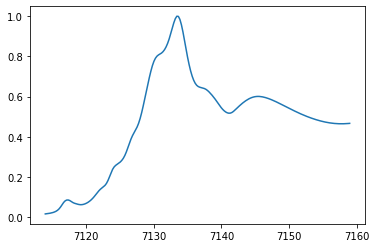

In [5]:
Fe2O3_object1_CenvPred = CenvPrediction(Fe2O3_XANES_object1, energy_reference='lowest', energy_range=45)
##Plot interpolated spectrum used in coordination environment prediction
plt.plot(Fe2O3_object1_CenvPred.interp_energy, Fe2O3_object1_CenvPred.interp_spectrum)

**Predict with random forest model**

In [6]:
Fe2O3_object1_CenvPred.cenv_prediction()
print('Predicted coordination environment label: ', Fe2O3_object1_CenvPred.pred_cenv)

INFO:veidt.rfxas.prediction:Loaded /Users/chenchi/repos/veidt/veidt/rfxas/./models/cnum/RandomForest_Fe_c_num.sav model
INFO:veidt.rfxas.prediction:Loaded /Users/chenchi/repos/veidt/veidt/rfxas/./models/cmotif/RandomForest_Fe_c_env_ex_CN_6.sav model


Predicted coordination environment label:  ['CN_6-octahedral-pentagonal pyramidal-hexagonal planar']


**Predict with CNN** 

Similarly one can set `model` to `knn`, `mlp`, `svc` or the previous random forest `rf` (default)

In [7]:
Fe2O3_object1_CenvPred = CenvPrediction(Fe2O3_XANES_object1, energy_reference='lowest', 
                                        energy_range=45, model='cnn')
Fe2O3_object1_CenvPred.cenv_prediction()
print('Predicted coordination environment label: ', Fe2O3_object1_CenvPred.pred_cenv)

INFO:veidt.rfxas.prediction:Loaded /Users/chenchi/repos/veidt/veidt/rfxas/./ex_models/Model_share/CNN_model/cnum/CNN_Fe_c_num.h5 model
INFO:veidt.rfxas.prediction:Loaded /Users/chenchi/repos/veidt/veidt/rfxas/./ex_models/Model_share/CNN_model/cmotif/CNN_Fe_c_env_CN_6_env_label.h5 model


Predicted coordination environment label:  ['CN_6-octahedral-pentagonal pyramidal-hexagonal planar']


### Initiate XANES object from Materials Project website downloaded spectrum file (tsv)

/Users/chenchi/repos/veidt/veidt/rfxas/core.py:79: UserWarning: Absorption specie is derived using the edge energy determined with maximum derivative.
  warnings.warn(warning_msg)
/Users/chenchi/repos/veidt/veidt/rfxas/core.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lambda x: np.abs(x - edge_energy))
/Users/chenchi/repos/veidt/veidt/rfxas/core.py:39: UserWarning: Edge energy is determined with maximum derivative. Using this e0 with caution.
  warnings.warn(warning_msg)


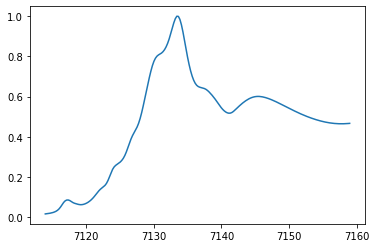

In [8]:
Fe2O3_XANES_object2 = XANES.from_K_XANES_MP_tsv('xas.XANES.K.Fe2O3.mp-24972.tsv')
Fe2O3_object2_CenvPred = CenvPrediction(Fe2O3_XANES_object2, energy_reference='lowest', energy_range=45)
##Plot interpolated spectrum used in coordination environment prediction
plt.plot(Fe2O3_object2_CenvPred.interp_energy, Fe2O3_object2_CenvPred.interp_spectrum)

In [9]:
Fe2O3_object2_CenvPred.cenv_prediction()
print('Predicted coordination environment label: ', Fe2O3_object2_CenvPred.pred_cenv)

INFO:veidt.rfxas.prediction:Loaded /Users/chenchi/repos/veidt/veidt/rfxas/./models/cnum/RandomForest_Fe_c_num.sav model
INFO:veidt.rfxas.prediction:Loaded /Users/chenchi/repos/veidt/veidt/rfxas/./models/cmotif/RandomForest_Fe_c_env_ex_CN_6.sav model


Predicted coordination environment label:  ['CN_6-octahedral-pentagonal pyramidal-hexagonal planar']
